# Nama :Ni Komang Tri Lestari

# Nim  :09011381722127

# SK5

# Implementasi Metode Logika Fuzzy dalam Pembangunan Sistem Optimalisasi Lampu Lalu Lintas


Lampu lalu lintas merupakan lampu untuk mengendalikan arus lalu lintas yang terpasang dipersimpangan jalan. lampu lalu lintas memiliki peran penting dalam mengatur lalu lintas khususnya persimpangan jalan. untuk mengatasi sebuah kemacetan yaitu dengan membangun sebuah sistem optimalisasi lalu lintas dimana secara otomatis disetiap titik fase persimpangan jalan bersinyal. sistem ini dibuat menggunakan metode logika fuzzy mamdani.
dengan memasukkan data 1. panjang antrian kendaraan yang diatur, 2. lebar jalan. dan keluarannya durasi lampu hijau.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# The universe of variables and membership functions

input :
1. Panjang antrian yang diatur 
2. Lebar jalan

output :
1. Durasi lampu hijau

In [2]:
Panjang_antrian_yang_diatur = ctrl.Antecedent(np.arange(0, 250, 1), 'Panjang_antrian_yang_diatur')
Lebar_jalan = ctrl.Antecedent(np.arange(0, 12, 0.1), 'Lebar_jalan')
Durasi_lampu_hijau= ctrl.Consequent(np.arange(0, 75, 1), 'Durasi_lampu_hijau')

# fuzzyfikasi lampu lalu lintas

## Nilai Linguistik pada Variabel panjang antrian yang diatur ada 3, yaitu:
- tidak padat
$$ tidak padat [x] = 
\begin{cases}
    1 & ; x \leq\ 20 \\
    \frac{(100-x)} {(100-20)} & ; 20 \leq x \leq\ 100 \\
    0 & ; x \geq 100
\end{cases}
$$

- normal
$$ normal [x] = 
\begin{cases}
    1 & ; x \leq 50\\
    \frac{(x-50)}{(100-50)} & ;50 \leq x \leq\ 100 \\
    \frac{(150-x)}{(150-100)} & ; 100 \leq  x \leq\ 150 \\
\end{cases}
$$

- padat
$$ padat [x] = 
\begin{cases}
    0 & ; x \leq 100\\
    \frac{(x-100)}{(250-100)} & ;100 \leq x \leq\ 250\\
    1 & ; x \geq 250
\end{cases}
$$

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


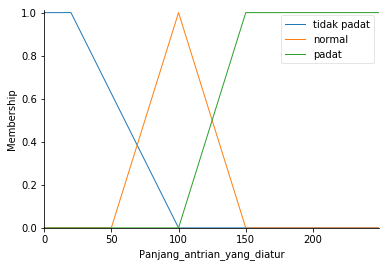

In [3]:
Panjang_antrian_yang_diatur['tidak padat'] = fuzz.trapmf(Panjang_antrian_yang_diatur.universe, [0, 0, 20, 100])
Panjang_antrian_yang_diatur['normal'] = fuzz.trimf(Panjang_antrian_yang_diatur.universe, [50, 100, 150])
Panjang_antrian_yang_diatur['padat'] = fuzz.trapmf(Panjang_antrian_yang_diatur.universe, [100, 150, 250, 250])


Panjang_antrian_yang_diatur.view()

Penjelasan dari grafik panjang antrian yang diatur :
    dari gambar diatas terlihat bahwa garis yang berwarna biru adalah tidak padat yaitu 0, 0, 20, dan 100.
    dan garis yang berwarna orange adalah normal, jadi panjang antriannya itu adalah normal yakni 50, 100, dan 150
    garis berwarna hijau adalah panjang antriannya padat yakni 100, 200,250, dan 250.
    
jika panjang antrian yang diatur tidak padat maka tidak terjadi kemacetan,  tetapi jika panjang antrian yang diatur normal maka tidak juga terjadi kemacetan dan jika panjang antrian yang diatur padat maka akan terjadi kemacetan.

## Nilai Linguistik pada Variabel lebar jalan yang di atur ada 3, yaitu:
- sempit
$$ sempit[x] = 
\begin{cases}
    1 & ; x \leq 0 \\
    \frac{(8-x)}{(8-0)} & ; 0 \leq  x \leq\ 8 \\
    0 & ; x \geq 8
\end{cases}
$$

- sedang
$$ sedang [x] = 
\begin{cases}
    0 & ; x \leq 4\\
    \frac{(x-4)}{(7-4)} & ; 4 \leq x \leq\ 7 \\
    \frac{(9-x)}{(9-7)} & ; 7 \leq  x \leq\ 9 \\
    0 & ; x \geq 9
\end{cases}
$$

- lebar
$$ lebar [x] = 
\begin{cases}
    0 & ; x \leq 6\\
    \frac{(x-6)}{(11-6)} & ; 6 \leq x \leq\ 11 \\
    1 & ; x \geq 11\\
\end{cases}
$$


C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


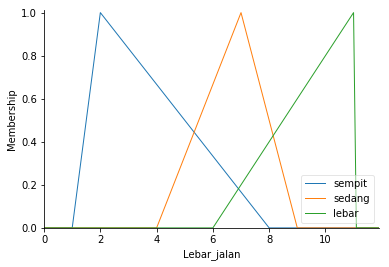

In [4]:
Lebar_jalan['sempit'] = fuzz.trimf(Lebar_jalan.universe, [1, 2, 8,])
Lebar_jalan['sedang'] = fuzz.trimf(Lebar_jalan.universe,[4, 7, 9,])
Lebar_jalan['lebar'] = fuzz.trapmf(Lebar_jalan.universe, [6, 11, 11,11,])


Lebar_jalan.view()

# Penjelasan dari grafik lebar jalan yang diatur :
    Gambar diatas menunjukan grafik lebar jalan. disana terlihat bahwa lebar jalan yang sempit yakni 0, 0, dan 8. dan lebar jalan sedang adalah 4, 7, dan 9. serta lebar jalan yag ditentukan lebar adalah 6, 11, dan 11
    
    1. jika lebar jalan sempit hanya bisa dilewati satu motor saja
    2. jika lebar jalan sedang maka bisa dilewati 2 motor
    3. jika lebar jalan lebar maka bisa dilewati dengan mobil.

## Nilai Linguistik pada Variabel durasi lampu hijau ada 3, yaitu:
- sebentar
$$ sebentar [z] = 
\begin{cases}
   1 & ; z \leq 10
    \frac{(30-z)}{(30-10)} & ; 10 \leq  z \leq\ 30 \\
    0 & ; z \geq 30 \\
\end{cases}
$$

- sedang
$$ sedang [z] = 
\begin{cases}
    0 & ; z \leq 10\\
    \frac{(z-10)}{(30-10)} & ;10 \leq z \leq\ 30 \\
    \frac{(50-z)}{(50-30)} & ; 30 \leq  z \leq\ 50 \\
    0 & ; z \geq 50
\end{cases}
$$

- lama
$$ lama [z] = 
\begin{cases}
    0 & ; z \leq 30\\
    \frac{(z-30)}{(50-30)} & ;30 \leq z \leq\ 50 \\
    1 & ; x \geq 50\\
\end{cases}
$$

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


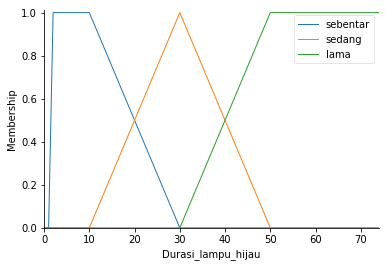

In [5]:
Durasi_lampu_hijau['sebentar'] = fuzz.trapmf(Durasi_lampu_hijau.universe, [2, 2, 10, 30])
Durasi_lampu_hijau['sedang'] = fuzz.trimf(Durasi_lampu_hijau.universe, [10, 30, 50])
Durasi_lampu_hijau['lama'] = fuzz.trapmf(Durasi_lampu_hijau.universe, [30, 50, 75, 75])


Durasi_lampu_hijau.view()

Penjelasan gambar pada grafik Durasi lampu hijau: 
    durasi lampu hijau adalah outputnya, yang memiliki Himpunan sebentar, sedang dan lama. nah terlihat pada gambar diatas menunjukan bahwa:
        1. durasi lampu hijau sebentar itu adalah 2, 2, 10 dan 30 yang ditunjukan oleh garis yang berwarna biru.
        2. durasi lampu hijau sedang itu adalah 10, 30, dan 50 yang ditunjukan oleh garis yang berwarna orange
        3. durasi lampu hijau lama itu adalah 30, 50, 75, dan 75 yang ditunjukan oleh garis berwarna hijau muda.

# Inferencing

saya di sini mengguanakan inputannya 3^2 yaitu 9, jadi rulenya adalah 9. dan outputnya 1 dengan 3 Himpunan(sebentar, sedang, lama). 

Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

1. if panjang antrian kendaraan pada jalur yang diatur tidak padat dan lebar jalan yang diatur sempit then durasi lampu hijau sedang
2. if panjang antrian kendaraan pada jalur yang diatur tidak padat dan lebar jalan yang diatur sedang then durasi lampu hijau sebentar
3. if panjang antrian kendaraan pada jalur yang diatur tidak padat dan lebar jalan yang diatur lebar then durasi lampu hijau sebentar
4. if panjang antrian kendaraan yang diatur normal dan lebar jalan sempit then durasi lampu hijau lama
5. if panjang antrian kendaraan yang diatur normal dan lebar jalan sedang then durasi lampu hijau sedang
6. if panjang antrian kendaraan yang diatur normal dan lebar jalan lebar then durasi lampu hijau sebentar
7. if panjang antrian kendaraan yang diatur padat dan lebar jalan sempit then durasi lampu hijau lama
8. if panjang antrian kendaraan yang diatur padat dan lebar jalan sedang then durasi lampu hijau sedang
9. if panjang antrian kendaraan yang diatur padat dan lebar lebar jalan lebar then durasi lampu hijau sebentar


In [6]:
rule1 = ctrl.Rule(Panjang_antrian_yang_diatur['tidak padat'] & Lebar_jalan['sempit'], Durasi_lampu_hijau['sedang'])
rule2 = ctrl.Rule(Panjang_antrian_yang_diatur['tidak padat'] & Lebar_jalan['sedang'], Durasi_lampu_hijau['sedang'])
rule3 = ctrl.Rule(Panjang_antrian_yang_diatur['tidak padat'] & Lebar_jalan['lebar'], Durasi_lampu_hijau['sebentar'])
rule4 = ctrl.Rule(Panjang_antrian_yang_diatur['normal'] & Lebar_jalan['sempit'], Durasi_lampu_hijau['lama'])
rule5 = ctrl.Rule(Panjang_antrian_yang_diatur['normal'] & Lebar_jalan['sedang'], Durasi_lampu_hijau['sedang'])
rule6 = ctrl.Rule(Panjang_antrian_yang_diatur['normal'] & Lebar_jalan['lebar'], Durasi_lampu_hijau['sebentar'])
rule7 = ctrl.Rule(Panjang_antrian_yang_diatur['padat'] & Lebar_jalan['sempit'], Durasi_lampu_hijau['lama'])
rule8 = ctrl.Rule(Panjang_antrian_yang_diatur['padat'] & Lebar_jalan['sedang'], Durasi_lampu_hijau['sedang'])
rule9 = ctrl.Rule(Panjang_antrian_yang_diatur['padat'] & Lebar_jalan['lebar'], Durasi_lampu_hijau['sebentar'])

Dari data dan kodingan diatas, rule nya tampil jika kita koding lagi rule1.vew(),sampai dengan rule9.vew(), tetapi disini tidak saya tampilkan. lanjut saja ke defuzzyfikasi

# RULE EVALUATION

In [7]:
braking_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

# DEFUZZIFIKASI

In [8]:
braking = ctrl.ControlSystemSimulation(braking_ctrl)

In [9]:
braking.input['Panjang_antrian_yang_diatur'] = 100
braking.input['Lebar_jalan'] = 10

In [10]:
braking.compute()

In [11]:
print(braking.output['Durasi_lampu_hijau'])

12.216504854368926


C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


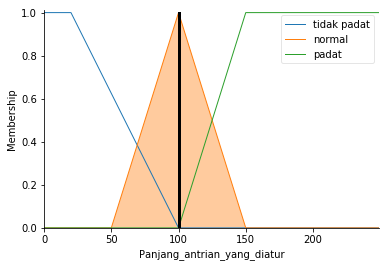

In [12]:
Panjang_antrian_yang_diatur.view(sim=braking)

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


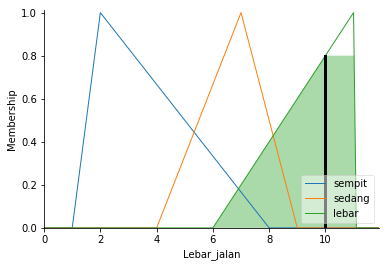

In [13]:
Lebar_jalan.view(sim=braking)

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


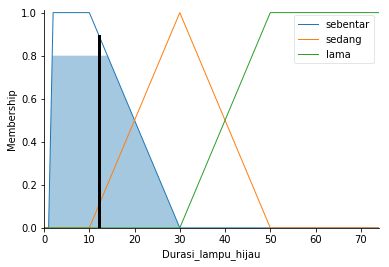

In [14]:
Durasi_lampu_hijau.view(sim=braking)

# Perhitungan Manual

 \begin{equation}
     panjang\ antrian\ yang\ diatur  = 110\\
     Masukkan\,nilai\,panjang\ antrian\ yang\ diatur\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,panjang\ antrian\ yang\ diatur\\
  panjang\ antrian\ yang\ diaturr ['tidak padat'] = \mu panjang\ antrian\ yang\ diaturtidakpadat (x)=\begin{cases}
   1, & \text{$20\leq x\leq100$}.\\
    (100 - x)/(100 - 20) , & \text{$20 \leq x \leq 100$}.\\
    0, & \text{$x\geq 100 $ }.\checkmark\\
  \end{cases}
  \\
 panjang\ antrian\ yang\ diatur ['normal'] = \mu panjang\ antrian\ yang\ diaturnormal(x)=\begin{cases}
    1, & \text{$x\leq 50$ atau $x\geq100$}.\\
    (x - 50)/(100 - 50) , & \text{$50 \leq x \leq 100$}.\\
    (150 - x)/(150 - 100) , & \text{$100 \leq x \leq 150$}.\checkmark\\
  \end{cases}
  \\
panjang\ antrian\ yang\ diatur ['padat'] = \mu panjang\ antrian\ yang\ diaturpadat(x)=\begin{cases}
    0, & \text{$x\leq 100$ atau $x\geq150$}.\\
    (x - 100)/(250 - 100) , & \text{$100 \leq x \leq 250$}.\checkmark\\
    1, & \text{$x\geq 250 $ }
  \end{cases}
  \\ 
\end{equation} 

\begin{equation}
    \mu panjang\ antrian\ normal(110) = (150 - 110) / (150 - 100) \\
    \mu panjang\ antrian\ normal(110) = (40) / (50) \\
    \mu panjang\ antrian\ normal(110) = 0.8 \\
    \end{equation}
    
\begin{equation}
    \mu panjang\ antrian\ padat(110) = (110 - 100) / (250-100) \\
    \mu panjang\ antrian\ padat(110) = 10/50 \\
    \mu panjang\ antrian\ padat(110) = 0.2 \\
\end{equation}
    


\begin{equation}
   lebar\ jalan = 10\\
   lebar\ jalan['sempit'] = \mu lebar\ jalansempit(x)=\begin{cases}
    1 & \text{$0\leq x \leq 8$}. \\
    \left.(8-x)\,\right(8-0) & ; \text{$0 \leq  x \leq\ 8$ }.\\
    0 & \text{$x \geq 8$}\checkmark\\
  \end{cases}
  \\
   lebar\ jalan['sedang'] = \mu lebar\ jalansedang(x)=\begin{cases}
    0 & \text{$0\leq x \leq 4$}. \\
    \left.(x-4)\,\right(7-4) & ; \text{$4 \leq  x \leq\ 7$ }.\\
    \left.(9-x)\,\right(9-7) & ; \text{$7 \leq  x \leq\ 9$ }.\\
    0 & \text{$x \geq 9$}\checkmark\\
\end{cases}
\\
lebar\ jalan['lebar'] = \mu lebar\ jalanlebar(x)=\begin{cases}
    0 & \text{$x\leq x \leq 6$}. \\
    \left.(x - 6)\, \right/(11 - 6) , & \text{$6 \leq x \leq 11$}.\checkmark\\
    1 & \text{$x \geq 11$}.
  \end{cases}
\end{equation}



\begin{equation}
    \mu lebar\ jalanlebar(10) = (10 - 6) / (11 - 6) \\
    \mu lebar\ jalanlebar(10) =4 / 5 \\ 
    \mu lebar\ jalanlebar(10) = 0.8 \\
    \end{equation}

Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

1 IF panjang antrian kendaraan pada jalur yang diatur tidak padat dan lebar jalan yang diatur sempit then durasi lampu hijau sedang

$$ \\ \alpha(predikat_1) = \mu panjang antrian yang diaturtidakpadat \cap \mu lebar jalan yang diatursempit $$
$$\alpha(predikat_1) = min (\mu anjang antrian kendaraan yang diaturtidakpadat [110], \mu lebar jalan yang diatursempit [10]) $$
$$ \alpha(predikat_1) = min (0; 0) $$
$$ \alpha(predikat_1) = 0 $$


Lalu lihat himpunan Durasi lampu hijau lama 
$$
   durasi lampu hijau['sedang'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 10$ atau $x\geq50$}.\\
    \left.(x - 10)\, \right/(30 - 10) , & \text{$10 \leq x \leq 30$}.\\
    \left.(50 - x)\, \right/(50 - 30) , & \text{$30 \leq x \leq 50$}.\\
  \end{cases}
$$
Maka nilai $ Z_1 = 0 $

=================================================================================================================

2 IF  panjang antrian kendaraan pada jalur yang diatur tidak padat dan lebar jalan yang diatur sedang then durasi lampu hijau sebentar

$$ \\ \alpha(predikat_2) = \mu panjang antrian kendaraan pada jalur yang diatur tidak padat \cap \mu lebar jalan yang diatur sedang $$
$$\alpha(predikat_2)   = min (\mu panjang antrian kendaraan pada jalur yang diatur tidak padat [110], \mu  lebar jalan yang diatur sedang[10]) $$
$$ \alpha(predikat_2) = min (0; 0) $$
$$ \alpha(predikat_2) = 0 $$

Lalu lihat himpunan Durasi lampu hijau Sedang 
$$
   durasi lampu hijau['sedang'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 10$ atau $x\geq50$}.\\
    \left.(x - 10)\, \right/(30 - 10) , & \text{$10 \leq x \leq 30$}.\\
    \left.(50 - x)\, \right/(50 - 30) , & \text{$30 \leq x \leq 50$}.\\
  \end{cases}
$$

Maka nilai $ Z_2 = 0 $

=================================================================================================================

3 IF panjang antrian kendaraan pada jalur yang diatur tidak padat AND lebar jalan yang diatur lebar then durasi lampu hijau sebentar

$$ \\ \alpha(predikat_3) = \mu panjang antrian kendaraan pada jalur yang diatur tidak padat  \cap \mu lebar jalan yang diatur lebar  $$
$$\alpha(predikat_3)   = min (\mu panjang antrian kendaraan pada jalur yang diatur tidak padat[110], \mu  lebar jalan yang diatur lebar [10]) $$
$$ \alpha(predikat_3) = min (0; 0.8) $$
$$ \alpha(predikat_3) = 0 $$

Lalu lihat himpunan Durasi lampu hijau sebentar
$$
  \\
   durasi lampu hijau['sebentar'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 2$ atau $x\geq30$}.\\
    \left.(x - 2)\, \right/(10 - 2) , & \text{$2 \leq x \leq 10$}.\\
    \left.(30 - x)\, \right/(30 - 10) , & \text{$10 \leq x \leq 30$}.\\
  \end{cases}
  $$
  

Maka nilai $ Z_3 = 0 $

=================================================================================================================

4 IF panjang antrian kendaraan yang diatur normal dan lebar lebar jalan sempit then durasi lampu hijau lama

$$ \\ \alpha(predikat_4) = \mu panjang antrian kendaraan yang diatur normal \cap \mu lebar lebar jalan sempit $$
$$\alpha(predikat_4)   = min (\mu panjang antrian kendaraan yang diatur normal[110], \mu lebar lebar jalan sempit[10]) $$
$$ \alpha(predikat_4) = min (1; 0) $$
$$ \alpha(predikat_4) =0 $$

durasi lampu hijau['lama'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 30$ atau $x\geq75$}.\\
    \left.(x - 30)\, \right/(50- 30) , & \text{$7 \leq x \leq 50$}.\\
    \left.(75 - x)\, \right/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
  \end{cases}
$$
Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_7$ = 0



=================================================================================================================
5 IF panjang antrian kendaraan yang diatur normal dan lebar jalan sedang then durasi lampu hijau sedang

$$ \\ \alpha(predikat_5) = \mu panjang antrian kendaraan yang diatur normal \cap \mu lebar jalan sedang $$
$$\alpha(predikat_5)   = min (\mu panjang antrian kendaraan yang diatur normal[110], \mu lebar jalan sedang  [10]) $$
$$ \alpha(predikat_5) = min (1; 0) $$
$$ \alpha(predikat_5) = 0 $$

Lalu lihat Durasi lampu hijau sedang
$$
    durasi lampu hijau['sedang'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 10$ atau $x\geq30$}.\\
    \left.(x - 10)\, \right/(30 - 10) , & \text{$10 \leq x \leq 30$}.\\
    \left.(50- x)\, \right/(50- 30) , & \text{$30 \leq x \leq 50$}.\\
  \end{cases}
$$
Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_7$ = 0

=================================================================================================================
6 IF panjang antrian kendaraan yang diatur normal dan lebar lebar jalan lebar then durasi lampu hijau sebentar 

$$ \\ \alpha(predikat_6) = \mu panjang antrian kendaraan yang diatur normal \cap \mu lebar lebar jalan lebar $$
$$\alpha(predikat_6)   = min (\mu panjang antrian kendaraan yang diatur normal[110], \mu lebar jalan lebar[10]) $$
$$ \alpha(predikat_6) = min (0,8; 0.8) $$
$$ \alpha(predikat_6) = 0.8 $$

Lalu lihat Durasi lampu hijau sebentar
$$
    durasi lampu hijau['sebentar'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 2$ atau $x\geq30$}.\\
    \left.(x - 2)\, \right/(10 - 2) , & \text{$2 \leq x \leq 10$}.\\
    \left.(30 - x)\, \right/(30 - 10) , & \text{$10 \leq x \leq 30$}.\\
  \end{cases}
$$
Terdapat 2 nilai keanggotaan maka kita uji satu persatu
$$(x- 2) / (10 - 2) = 0.8 $$
 $$(x - 2) = 0.8 \times 8 $$
 $$ x - 2 = 6.4 $$
 $$ x = 8.4 $$
 
 $$ (30- x) / (30 -10) = 0.8 $$
 $$ (30 - x) = 16 $$
 $$ - x = -45 $$
 $$ x = 45 $$

Akan diambil nilai terkecil
Maka nilai $ Z_6 = 8.4 $$

=================================================================================================================

7 IF panjang antrian kendaraan yang diatur padat dan lebar lebar jalan sempit then durasi lampu hijau lama
$$ \\ \alpha(predikat_7) = \mu panjang antrian kendaraan yang diatur padat \cap \mu lebar lebar jalan sempit $$
$$\alpha(predikat_7)   = min (\mu panjang antrian kendaraan yang diatur padat[110], \mu lebar lebar jalan sempit[10]) $$
$$ \alpha(predikat_7) = min (0; 0) $$
$$ \alpha(predikat_7) = 0 $$

Lalu lihat Durasi lampu hijau lama

$$
   durasi lampu hijau['lama'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 30$ atau $x\geq75$}.\\
    \left.(x - 30)\, \right/(50- 30) , & \text{$7 \leq x \leq 50$}.\\
    \left.(75 - x)\, \right/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_7$ = 0

=================================================================================================================

8 IF panjang antrian kendaraan yang diatur padat dan lebar lebar jalan sedang then durasi lampu hijau sedang
$$ \\ \alpha(predikat_8) = \mu panjang antrian kendaraan yang diatur padat \cap \mu lebar lebar jalan sedang $$
$$\alpha(predikat_8)   = min (\mu panjang antrian kendaraan yang diatur padat[110], \mu lebar lebar jalan sedang[10]) $$
$$ \alpha(predikat_8) = min (0; 0) $$
$$ \alpha(predikat_8) = 0 $$

Lalu lihat Durasi Lampu hijau sedang
$$
  \\
   durasi lampu hijau[' sedang'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 10$ atau $x\geq30$}.\\
    \left.(x - 10)\, \right/(30 - 10) , & \text{$10 \leq x \leq 30$}.\\
    \left.(50- x)\, \right/(50- 30) , & \text{$30 \leq x \leq 50$}.\\
  \end{cases}
  \\
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_8$ = 0

=================================================================================================================

9 IF panjang antrian kendaraan yang diatur padat dan lebar jalan lebar then durasi lampu hijau sebentar
$$ \\ \alpha(predikat_9) = \mu  panjang antrian kendaraan yang diatur padat \cap \mu KelembabanBasah $$
$$\alpha(predikat_9)   = min (\mu panjang antrian kendaraan yang diatur padat[110], \mu lebar jalan lebar[10]) $$
$$ \alpha(predikat_9) = min (0.2; 0.8) $$
$$ \alpha(predikat_9) = 0.2 $$

Lalu lihat himpunan Durasi lampu hijau sebentar
$$ 
\\
    durasi lampu hijau['sebentar'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 2$ atau $x\geq30$}.\\
    \left.(x - 2)\, \right/(10 - 2) , & \text{$2 \leq x \leq 10$}.\\
    \left.(30 - x)\, \right/(30 - 10) , & \text{$10 \leq x \leq 30$}.\\
  \end{cases}
  \\
$$

Terdapat 2 nilai keanggotaan maka kita uji satu persatu
$$(x- 2) / (10 - 2) = 0.2 $$
 $$(x - 2) = 0.2 \times 8 $$
 $$ x - 2 = 1.6 $$
 $$ x = 3.6 $$
 
 $$ (30- x) / (30 -10) = 0.2 $$
 $$ (30 - x) = 6 $$
 $$ - x = -35 $$
 $$ x = 35 $$

Akan diambil nilai terkecil
Maka nilai $ Z_9 = 3.6 $$




Dari sini kita dapat mencari nilai z, yaitu :

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 }
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 }$$

$$Z = \frac{0 \times 0 + 0 \times 0 + 0 \times 0 + 0 \times 0  + 0 \times 0 + 0.8 \times 8.4 + 0 \times 0 + 0 \times 0 + 0.2\times 3.6}{0 + 0 + 0 + 0 + 0 + 0.8 + 0 + 0 + 0.2} $$
 
 $$ Z = \frac{7.44}{1} $$
 $$ Z = 7.44 \, detik $$

Hasil output yang dikeluarkan menggunakan code python sebesar 12.216 detik sedangkan perhitungan manual sebesar 7.44 detik
Terdapat perbedaan sebesar 4.776 detik